In [10]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import SVC

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

pd.set_option('display.max_colwidth', -1)
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

%matplotlib inline

[nltk_data] Downloading package wordnet to /home/allyson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Análise exploratória dos dados
Inicialmente iremos observar algumas informações iniciais sobre a base de dados. Com base em pesquisas sobe a base de dados consegui descobrir algumas informações interessantes.

The sentiment labels are:

0 - negative

1 - somewhat negative

2 - neutral

3 - somewhat positive

4 - positive

In [2]:
df = pd.read_csv("dados/train.tsv", sep="\t")

In [3]:
df.describe()

,Id,IdSentenca,Sentimento
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [4]:
df

,Id,IdSentenca,Texto,Sentimento
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for the goose,2


In [5]:
df.Sentimento = pd.Categorical(df.Sentimento)

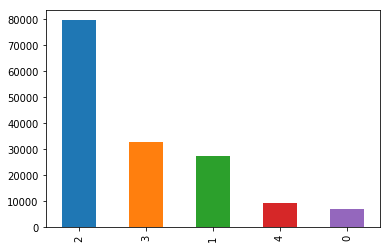

In [6]:
df.Sentimento.value_counts().plot.bar()

### Preparação dos dados para o modelo

A seguir serão realizadas etapas de pré-processamento com o objetivo de tornar os dados próprios para os processos de treino e teste. 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.Texto, df.Sentimento, test_size=0.2, shuffle=True)

In [8]:
def clean_sentences(df):
    reviews = []

    for sent in df:
          
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", sent)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

#cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(x_train)
test_sentences = clean_sentences(x_test)
print(len(train_sentences))
print(len(test_sentences))

124848
31212


In [9]:
def report(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("acurácia: " + str(clf.score(x_test, y_test)))
    print(classification_report(y_test, y_pred))

### Treino e Teste com Naive Bayes

Fizemos teste utilizando cross validation e uma divisão usando train_test_split do sklearn. A primeira para ter uma visão mais macro do desempenho do modelo e a seguda para verifcar como cada classe estava sendo avaliada.

In [11]:
naive_pip = Pipeline([("counts", CountVectorizer()),
                      ("classifier", MultinomialNB())])
report(naive_pip, x_train, x_test, y_train, y_test)

acurácia: 0.6094450852236319
             precision    recall  f1-score   support

          0       0.42      0.30      0.35      1454
          1       0.49      0.43      0.46      5509
          2       0.69      0.77      0.73     15805
          3       0.52      0.51      0.51      6570
          4       0.49      0.34      0.40      1874

avg / total       0.60      0.61      0.60     31212



In [12]:
scoring = ['precision_macro', 'recall_macro']
cross_validate(naive_pip, df.Texto, df.Sentimento, scoring=scoring, cv=5)

/home/allyson/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/allyson/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([1.89041686, 1.93228292, 1.8529315 , 2.04551792, 2.02107   ]),
 'score_time': array([0.89078188, 1.01947141, 0.98106146, 1.055475  , 1.0290072 ]),
 'test_precision_macro': array([0.47224536, 0.42281415, 0.42328417, 0.43829074, 0.46495225]),
 'test_recall_macro': array([0.3776469 , 0.37063204, 0.36526491, 0.37338739, 0.38080753]),
 'train_precision_macro': array([0.60431679, 0.608656  , 0.60826417, 0.61305397, 0.61116037]),
 'train_recall_macro': array([0.55273791, 0.55749974, 0.55267289, 0.55408693, 0.55734441])}

In [13]:
naive_pip2 = Pipeline([("counts", TfidfVectorizer()),
                      ("classifier", MultinomialNB())])
report(naive_pip2, x_train, x_test, y_train, y_test)

acurácia: 0.5848071254645649
             precision    recall  f1-score   support

          0       0.51      0.04      0.07      1454
          1       0.52      0.25      0.34      5509
          2       0.60      0.90      0.72     15805
          3       0.53      0.38      0.45      6570
          4       0.62      0.05      0.10      1874

avg / total       0.57      0.58      0.53     31212



In [23]:
naive_pip_ngram = Pipeline([("counts", CountVectorizer(ngram_range=(1, 3))),
                      ("classifier", MultinomialNB())])
report(naive_pip_ngram, x_train, x_test, y_train, y_test)

acurácia: 0.5739138792772011
             precision    recall  f1-score   support

          0       0.35      0.48      0.40      1440
          1       0.45      0.51      0.48      5557
          2       0.74      0.64      0.68     15819
          3       0.48      0.52      0.50      6537
          4       0.39      0.50      0.43      1859

avg / total       0.60      0.57      0.58     31212



### Test usando Random Forest

Por ser um algoritmo de aprendizagem de máquina que tradicionalmente tem apresentado bons resultados nos mais diversos segmentos, inclusive no campo de processamento de linguagem natural, decidi testá-lo.

In [15]:
rf_pip = Pipeline([("counts", CountVectorizer()),
                      ("classifier", RandomForestClassifier(n_estimators=200, random_state=0))])
report(rf_pip, x_train, x_test, y_train, y_test)

acurácia: 0.6321927463795975
             precision    recall  f1-score   support

          0       0.44      0.36      0.40      1454
          1       0.54      0.45      0.49      5509
          2       0.70      0.81      0.75     15805
          3       0.55      0.48      0.51      6570
          4       0.50      0.39      0.44      1874

avg / total       0.62      0.63      0.62     31212



In [16]:
rf_pip2 = Pipeline([("counts", TfidfVectorizer()),
                      ("classifier", RandomForestClassifier(n_estimators=200, random_state=0))])
report(rf_pip2, x_train, x_test, y_train, y_test)

acurácia: 0.640234525182622
             precision    recall  f1-score   support

          0       0.47      0.36      0.40      1454
          1       0.56      0.44      0.49      5509
          2       0.70      0.84      0.76     15805
          3       0.57      0.47      0.52      6570
          4       0.53      0.38      0.45      1874

avg / total       0.63      0.64      0.63     31212



### Conclusão

Entre os classificadores testados pude constatar que o Random Forest aprensentou melhor desempenho, principalmente quando a contagem é feita utilizando TF-IDF. Podemos observar isso pelos valores da acurácia, 64%; precision 63% e recall, 64% no melhor caso testado. 
Além disso, é possível perceber que a classe das sentenças neutras (2) é classificada com melhor precisão e tem um maior recall em relação aos outros tipos de sentenças, provavelmente pelo fato de ter mais sentenças pertencentes a está classe.

### Planos futuros e possíveis melhorias

Como sugestão de melhorias, poderia ser testados ajustes de hiper parâmetros usando Grid Search, utilizar outros algoritmos de aprendizagem de máquina como SVM e MLP e, talvez, uma análise mais profunda dos dados com o objetivos de encontrar padrões ou fazer um melhor pré-processamento.

### Teste usando Logistic regression

In [12]:
lr_pip = Pipeline([("counts", CountVectorizer()),
                      ("classifier", LogisticRegression())])
report(lr_pip, x_train, x_test, y_train, y_test)

acurácia: 0.6357490708701782
             precision    recall  f1-score   support

          0       0.54      0.27      0.36      1440
          1       0.53      0.36      0.43      5557
          2       0.67      0.89      0.76     15819
          3       0.59      0.43      0.50      6537
          4       0.60      0.33      0.43      1859

avg / total       0.62      0.64      0.61     31212



In [14]:
lr_pip_tdif = Pipeline([("counts", TfidfVectorizer()),
                      ("classifier", LogisticRegression())])
report(lr_pip_tdif, x_train, x_test, y_train, y_test)

acurácia: 0.6231897987953351
             precision    recall  f1-score   support

          0       0.60      0.15      0.25      1440
          1       0.52      0.32      0.40      5557
          2       0.65      0.90      0.75     15819
          3       0.57      0.44      0.50      6537
          4       0.64      0.21      0.32      1859

avg / total       0.61      0.62      0.59     31212



In [17]:
lr_pip_2gran = Pipeline([("counts", CountVectorizer(min_df=5, ngram_range=(2, 2))),
                      ("classifier", LogisticRegression())])
report(lr_pip_2gran, x_train, x_test, y_train, y_test)

acurácia: 0.6136742278610791
             precision    recall  f1-score   support

          0       0.53      0.26      0.35      1440
          1       0.55      0.33      0.41      5557
          2       0.63      0.89      0.74     15819
          3       0.58      0.35      0.44      6537
          4       0.56      0.28      0.37      1859

avg / total       0.60      0.61      0.58     31212



In [21]:
lr_pip_ngran = Pipeline([("counts", CountVectorizer(min_df=5, ngram_range=(1, 3))),
                      ("classifier", LogisticRegression(C=1))])
report(lr_pip_ngran, x_train, x_test, y_train, y_test)

acurácia: 0.6500704857106241
             precision    recall  f1-score   support

          0       0.51      0.33      0.40      1440
          1       0.56      0.42      0.48      5557
          2       0.70      0.86      0.77     15819
          3       0.60      0.48      0.53      6537
          4       0.56      0.38      0.45      1859

avg / total       0.63      0.65      0.63     31212



In [20]:
lr_pip_ngran = Pipeline([("counts", CountVectorizer(min_df=5, ngram_range=(1, 3))),
                      ("classifier", LogisticRegression(C=1))])
report(lr_pip_ngran, x_train, x_test, y_train, y_test)

acurácia: 0.6500704857106241
             precision    recall  f1-score   support

          0       0.51      0.33      0.40      1440
          1       0.56      0.42      0.48      5557
          2       0.70      0.86      0.77     15819
          3       0.60      0.48      0.53      6537
          4       0.56      0.38      0.45      1859

avg / total       0.63      0.65      0.63     31212

